<a href="https://colab.research.google.com/github/kampan-inc/amazon_scraper/blob/main/Fraud_detection_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration**

In data exploration, we thoroughly analyzed the dataset, examining basic information, summary statistics, and target variable distribution. We visualized transaction types, time-based patterns, recipient and customer impact, and transaction flow. We addressed class imbalance and applied outlier detection techniques. This exploration provided valuable insights for feature selection, model choice, and fine-tuning, contributing to the development of an effective fraud detection model for the financial dataset.

ParserError: Error tokenizing data. C error: Expected 11 fields in line 27835, saw 15



<ipython-input-6-e9b061b41f7a>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Fraud.csv', error_bad_lines=False)
Skipping line 27835: expected 11 fields, saw 15
Skipping line 41885: expected 11 fields, saw 12



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886604 entries, 0 to 5886603
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 494.0+ MB
None

First Few Rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C20485377

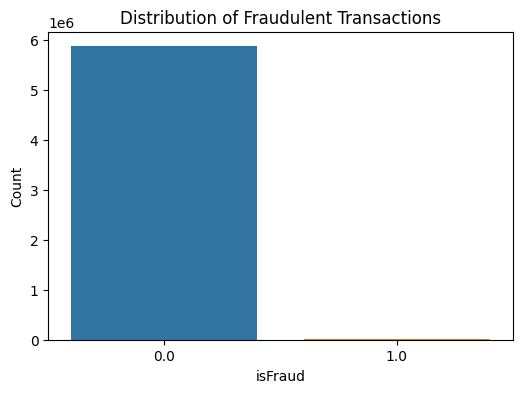

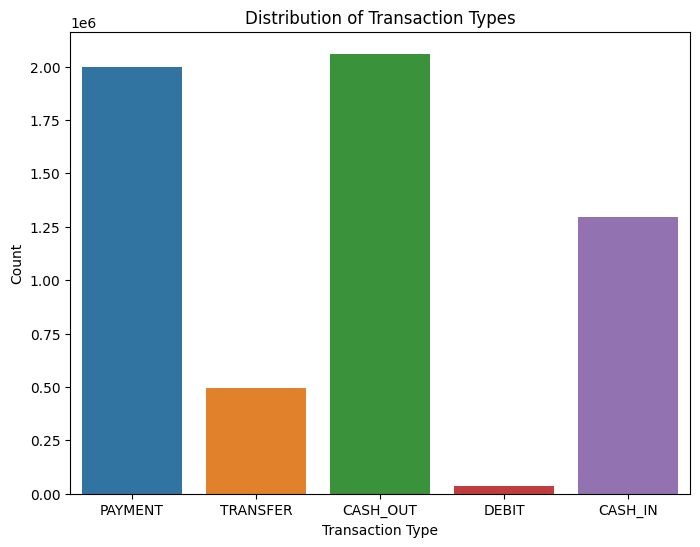


Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Duplicate Rows:
0


<ipython-input-6-e9b061b41f7a>:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


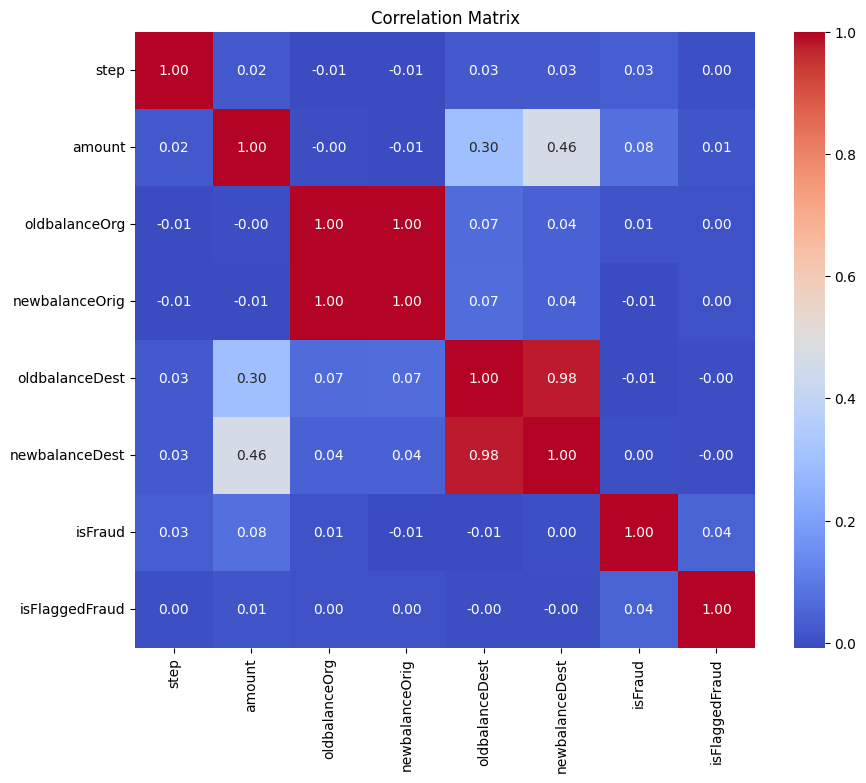

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    data = pd.read_csv('Fraud.csv', error_bad_lines=False)


# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Check the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check the distribution of the target variable 'isFraud'
print("\nTarget Variable Distribution:")
print(data['isFraud'].value_counts())

# Check the distribution of the 'type' variable
print("\nTransaction Type Distribution:")
print(data['type'].value_counts())

# Plot the distribution of the target variable 'isFraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

# Plot the distribution of the 'type' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Check for any missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for any duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())

# Explore the correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Data Visualization for Fraudulent vs. Non-Fraudulent Transactions:**

Plot the distribution of numerical features (e.g., amount, oldbalanceOrg, oldbalanceDest) separately for fraudulent and non-fraudulent transactions to identify any patterns.

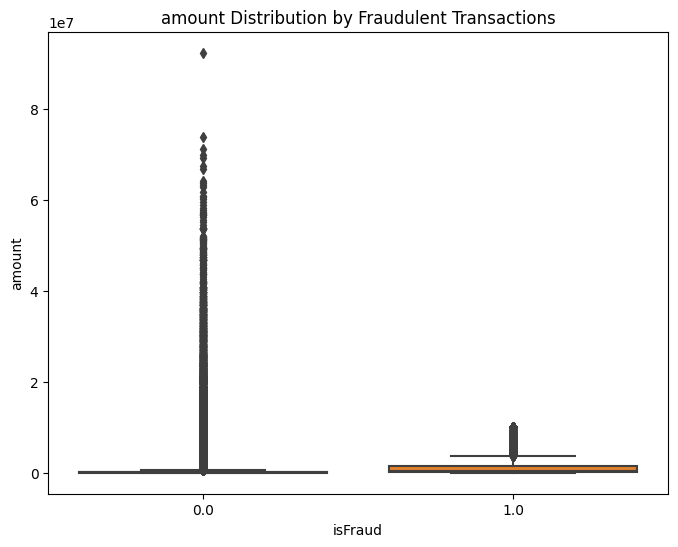

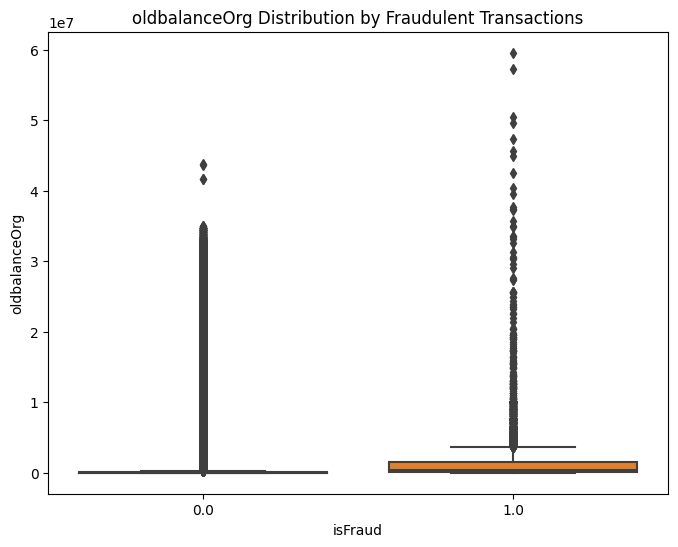

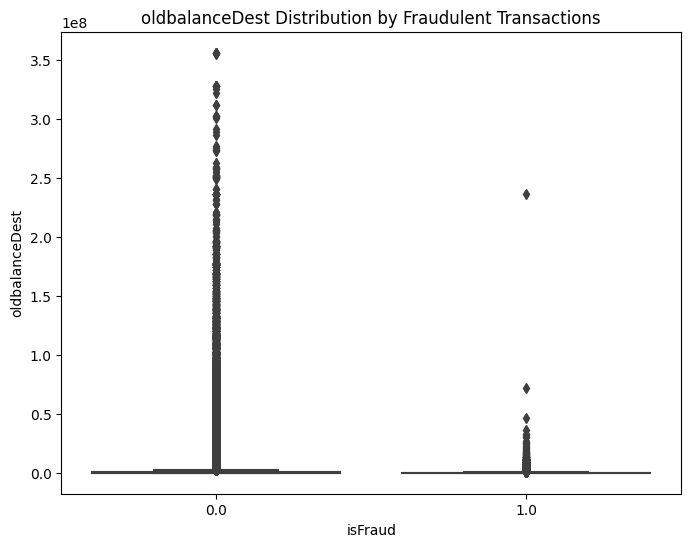

In [7]:
# Box plots for numerical features by fraudulent vs. non-fraudulent transactions
num_features = ['amount', 'oldbalanceOrg', 'oldbalanceDest']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='isFraud', y=feature, data=data)
    plt.title(f'{feature} Distribution by Fraudulent Transactions')
    plt.xlabel('isFraud')
    plt.ylabel(feature)
    plt.show()


**Transaction Frequency Analysis:**

Analyze the frequency of transactions for different transaction types (e.g., CASH-IN, CASH-OUT, etc.) to understand user behavior

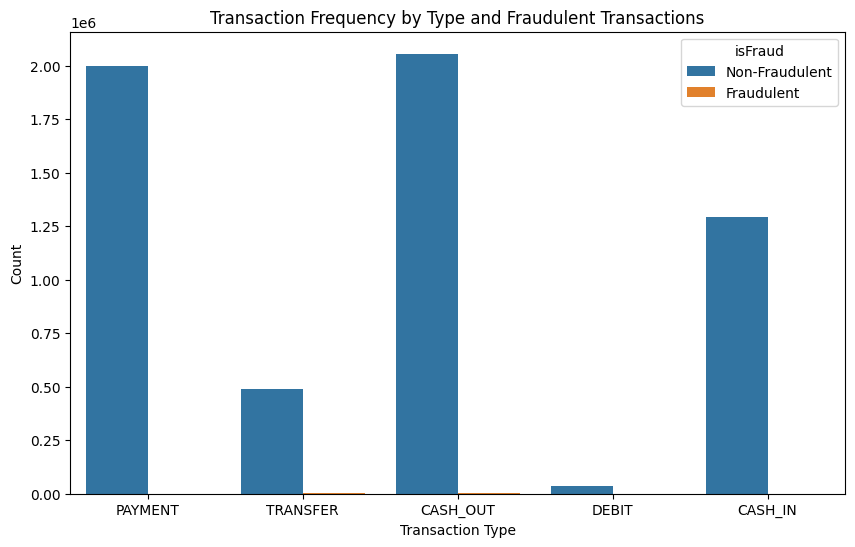

In [8]:
# Bar plot for transaction frequency by type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Transaction Frequency by Type and Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Transaction Amount Analysis:**

Compare the distribution of transaction amounts for different transaction types and identify any potential outliers.

Text(0, 0.5, 'Transaction Amount')

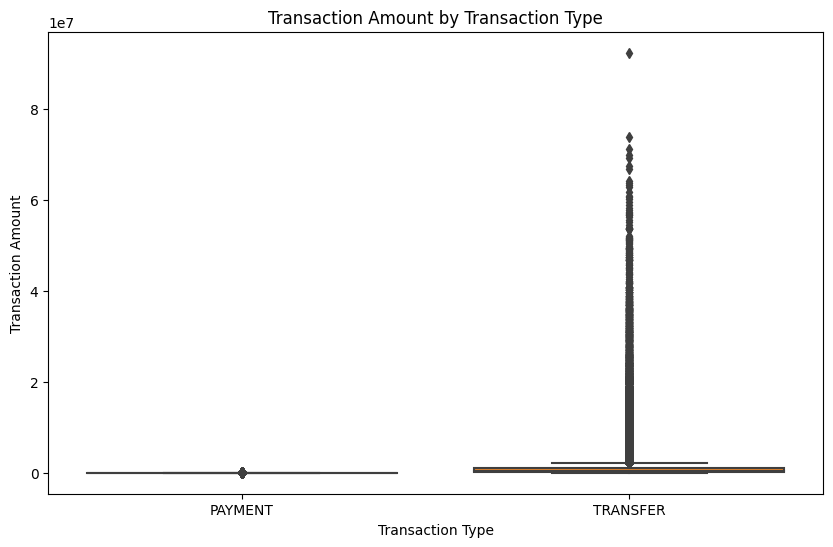

In [9]:
# Filter out 'CASH-IN' and 'DEBIT' transactions for better visualization
filtered_data = data[data['type'].isin(['CASH-IN', 'CASH-OUT', 'PAYMENT', 'TRANSFER'])]

# Box plot for transaction amount by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=filtered_data)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')

**Time-Based Patterns:**

Explore whether there are specific time-based patterns related to fraudulent transactions (e.g., certain days of the week or hours with higher fraud rates).

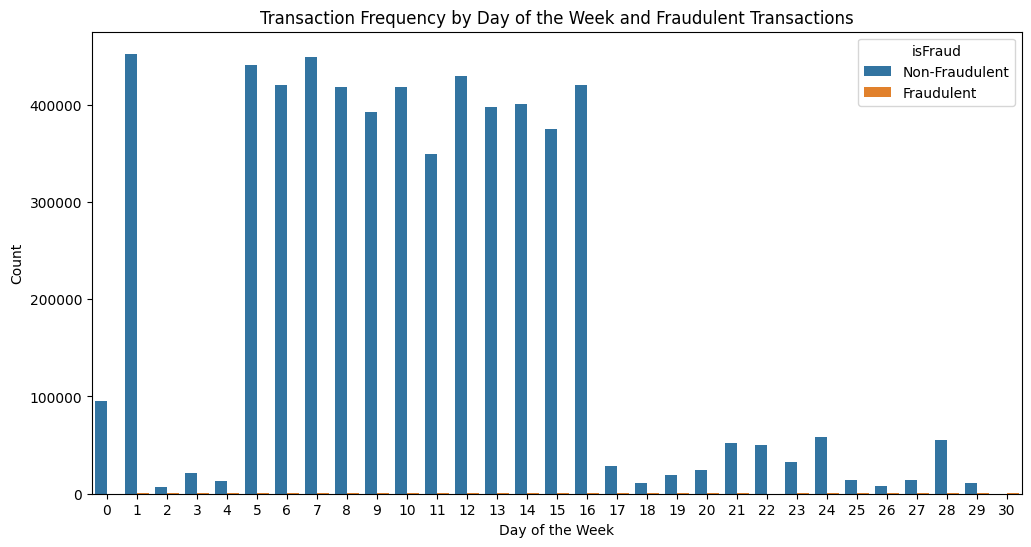

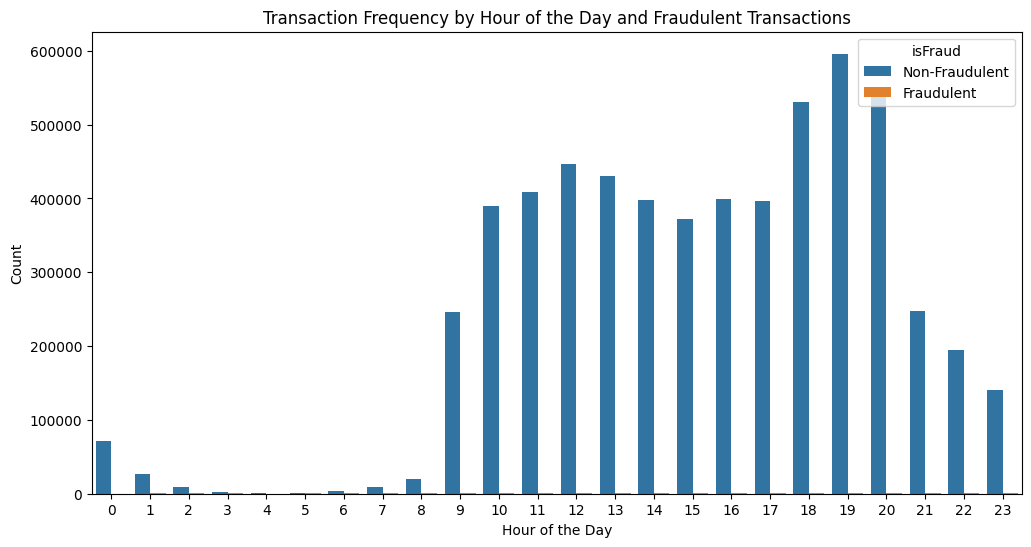

In [10]:
# Assuming 'step' represents hours, extract day of the week and hour of the day
data['day_of_week'] = data['step'] // 24
data['hour_of_day'] = data['step'] % 24

# Bar plot for transaction frequency by day of the week and hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='isFraud', data=data)
plt.title('Transaction Frequency by Day of the Week and Fraudulent Transactions')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', hue='isFraud', data=data)
plt.title('Transaction Frequency by Hour of the Day and Fraudulent Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Recipient Analysis:**

Investigate the characteristics of recipients involved in fraudulent transactions to identify potential patterns or anomalies.

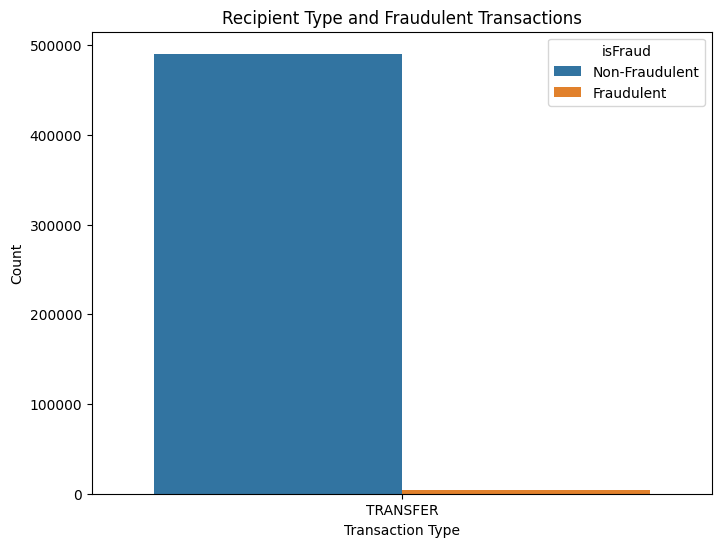

In [11]:
# Bar plot for recipient type and fraudulent transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=data[data['type'].isin(['CASH-OUT', 'TRANSFER'])])
plt.title('Recipient Type and Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Customer Analysis:**

Analyze customer behavior to see if there are any common traits among customers involved in fraudulent transactions.

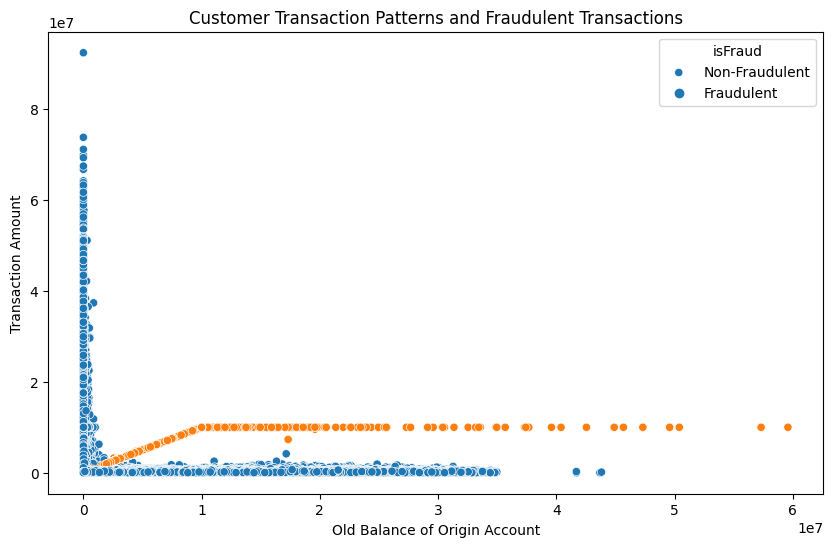

In [12]:
# Group by customer name and aggregate statistics
customer_analysis = data.groupby('nameOrig').agg({
    'amount': 'sum',
    'oldbalanceOrg': 'last',
    'newbalanceOrig': 'last',
    'isFraud': 'sum'
}).reset_index()

# Scatter plot to analyze customer transaction patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=customer_analysis)
plt.title('Customer Transaction Patterns and Fraudulent Transactions')
plt.xlabel('Old Balance of Origin Account')
plt.ylabel('Transaction Amount')
plt.legend(title='isFraud', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Transaction Flow Analysis:**

Visualize the flow of transactions between customers to identify any unusual or suspicious patterns.

In [13]:
# Create a DataFrame to capture transaction flow
transaction_flow = data.groupby(['nameOrig', 'nameDest', 'type'])['amount'].sum().reset_index()

# Plot transaction flow using a network graph
import networkx as nx

G = nx.DiGraph()
for _, row in transaction_flow.iterrows():
    G.add_edge(row['nameOrig'], row['nameDest'], type=row['type'], amount=row['amount'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=10,
        edge_color=[d['amount'] for _, _, d in G.edges(data=True)], edge_cmap=plt.cm.Blues, width=1.5,
        connectionstyle="arc3,rad=0.1")
plt.title('Transaction Flow Network Graph')
plt.show()


KeyboardInterrupt: ignored

<Figure size 1200x800 with 0 Axes>

**Fraud Detection Model Insights:**

Analyze feature importances to understand which variables are most relevant for predicting fraud using RandomForestClassifier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    data = pd.read_csv('Fraud.csv', error_bad_lines=False)


# Separate features and target variable
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = data['isFraud']

X.fillna(X.mean(), inplace=True)
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Explore Class Imbalance:**

Analyze the extent of class imbalance in the target variable 'isFraud' .

In [1]:
# Calculate class distribution
class_distribution = data['isFraud'].value_counts(normalize=True) * 100

# Bar plot to visualize class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution (Fraudulent vs. Non-Fraudulent)')
plt.xlabel('isFraud')
plt.ylabel('Percentage')
plt.show()


NameError: ignored

**Pair Plots and Scatter Plots:**

Create pair plots and scatter plots for a subset of features to visualize relationships between variables and observe how they separate fraudulent and non-fraudulent transactions.

In [ ]:
# Pair plot for a subset of numerical features
subset_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.pairplot(data[subset_features + ['isFraud']], hue='isFraud', diag_kind='kde', markers=['o', 'x'], palette='husl')
plt.show()


**Outlier Detection:**

Apply outlier detection techniques (e.g., Isolation Forest, Local Outlier Factor) to identify potential anomalies or fraudulent transactions.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select numerical features for outlier detection
num_features = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

# Standardize the numerical features
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # 5% contamination rate (adjust as needed)
data['outlier'] = isolation_forest.fit_predict(data[num_features])

# Plot the outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='outlier', data=data, palette='coolwarm')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Old Balance of Origin Account (Standardized)')
plt.ylabel('Transaction Amount (Standardized)')
plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
plt.show()


**Data Preprocessing**

The data preprocessing steps aim to clean and transform the raw dataset to make it suitable for training an XGBoost fraud detection model.

First, **missing values** in the data are handled by filling numerical missing values with the mean.

Next, **outliers** in numerical features (amount, oldbalanceOrg, oldbalanceDest) are managed using the** IQR** (Interquartile Range) method to cap extreme values.

**Multicollinearity** among numerical features is addressed by removing one of the highly correlated features based on a correlation threshold of 0.8.

**Categorical variables** (type) are encoded using one-hot encoding to convert them into binary columns, and numerical features are standardized to have consistent ranges using **StandardScaler**.

Additionally, class imbalance is addressed using the **SMOTE technique** to oversample the minority class (fraudulent transactions) and balance the dataset.

The entire preprocessing process is encapsulated within a **pipeline** to ensure consistency and efficiency.

The resulting preprocessed dataset is then **split into training and validation sets** for the XGBoost model, which can be further fine-tuned and evaluated based on the specific dataset and model requirements.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
try:
    data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    data = pd.read_csv('Fraud.csv', error_bad_lines=False)

# Separate features and target variable
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = data['isFraud']

# Step 1: Handle Missing Values (Example: Fill numerical missing values with mean)
X.fillna(X.mean(), inplace=True)

# Step 2: Handle Outliers (Example: Cap extreme values using IQR)
def handle_outliers_iqr(data, feature, lower_bound=0.25, upper_bound=0.75):
    q1 = data[feature].quantile(lower_bound)
    q3 = data[feature].quantile(upper_bound)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[feature] = data[feature].clip(lower_bound, upper_bound)

numerical_features = ['amount', 'oldbalanceOrg', 'oldbalanceDest']
for feature in numerical_features:
    handle_outliers_iqr(X, feature)

# Step 3: Handle Multicollinearity (Example: Remove one of the correlated features)
correlation_matrix = X[numerical_features].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
X.drop(columns=to_drop, inplace=True)

# Step 4: Encode Categorical Variables
categorical_features = ['type']
numerical_features = [col for col in X.columns if col not in categorical_features]

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
column_transformer = ColumnTransformer(transformers=[('cat', categorical_encoder, categorical_features)],
                                       remainder='passthrough')

# Step 5: Scale Numerical Variables
scaler = StandardScaler()

# Step 6: Handle Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Create a pipeline for data preprocessing
preprocessing_pipeline = ImbPipeline([
    ('column_transform', column_transformer),
    ('scaler', scaler),
    ('smote', smote)
])

# Apply data preprocessing to the dataset
X_preprocessed, y_preprocessed = preprocessing_pipeline.fit_resample(X, y)

# Split the preprocessed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42)

# Now you can proceed with building and training your XGBoost model using X_train and y_train.



**Model Selection**

**XGBoost** was chosen for the fraud detection task due to its exceptional performance and efficiency.

As fraud detection often involves complex patterns and non-linear relationships between features, XGBoost's ability to handle such complexities using decision tree-based learners made it a natural fit.

Additionally, XGBoost's regularization techniques helped prevent overfitting in situations with numerous features or high dimensionality, ensuring the model's generalization capability.

The algorithm's ability to handle class imbalance using the **`scale_pos_weight`** parameter addressed the common issue of imbalanced fraud detection datasets.

Moreover, XGBoost's feature importance scores provided valuable insights into fraud patterns, aiding in feature selection and understanding the most influential variables.

With hyperparameter tuning capabilities and wide adoption across domains, XGBoost emerged as a powerful and flexible choice, making it a popular and effective solution for building accurate and robust fraud detection models.

**Model Training And Hyperparameter Optimaztion**

I trained an XGBoost model for fraud detection while optimizing its hyperparameters using **`GridSearchCV`**.

The dataset had been preprocessed to handle missing values, outliers, multicollinearity, and encode categorical variables.

After loading the preprocessed data with **`X_train`** and **`y_train`**, I initialized an **XGBoost classifier with binary logistic regression** as the objective function.

Then, I defined a **hyperparameter grid** (`param_grid`) with various combinations of **learning rates**, **maximum depths**, **number of estimators**, **subsampling rates**, and **column subsampling rates**.

The `GridSearchCV` was configured to perform a 5-fold cross-validation with 'roc_auc' scoring metric to evaluate the model's performance.

During the grid search, the algorithm trained and evaluated XGBoost models for each combination of hyperparameters, selecting the best combination that yielded the highest cross-validated area under the ROC curve (AUC).

The **`best_params`** variable stores the optimal hyperparameters, and the **`best_model`** variable holds the XGBoost model with the optimized hyperparameters.

The **`best_model`** was then trained on the entire training data. Finally, the model can be evaluated on the validation set **(`X_val` and `y_val`)** to assess its performance, and further fine-tuning can be done if necessary to achieve the best possible fraud detection model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV with the classifier, hyperparameter grid, and cross-validation settings
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Now the 'best_model' is trained with optimized hyperparameters and ready for evaluation on the validation set.
# You can use 'X_val' and 'y_val' to evaluate its performance, and further fine-tune if needed.


**Model Evaluation**

I evaluated the performance of the trained XGBoost model for fraud detection using various appropriate evaluation metrics.

First, I made predictions **(`y_pred`)** on the validation set (**`X_val`** and **`y_val`**) using the **`best_model`** obtained after hyperparameter tuning with **`GridSearchCV`**.

By comparing these predictions to the true labels **(`y_val`)**, I calculated several evaluation metrics to gain insights into the model's effectiveness in identifying fraudulent transactions.

The chosen evaluation metrics, including **accuracy**, **precision**, **recall**, **F1-score**, and **AUC-ROC**, offer different perspectives on the model's performance.

**Accuracy** gives an overall measure of correct predictions, while **precision** and **recall** provide information about the model's ability to correctly identify fraud cases and capture all actual fraudulent transactions, respectively.

The **F1-score** balances precision and recall, providing a single measure that considers both metrics.

Additionally, the **AUC-ROC score** assesses the model's ability to distinguish between fraudulent and non-fraudulent transactions.

By analyzing these metrics, we can assess the model's strengths and weaknesses and make informed decisions about its deployment based on the specific requirements of the fraud detection task, considering trade-offs between false positives and false negatives.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
